# Universidad Central de Venezuela
## Facultad de Ciencias
### Escuela de Computación
#### Aprendizaje Automático

**Joiner Rojas V29501730**

#### Tarea #2 - Parte  REGRESIÓN LOGÍTICA/CLASIFICACIÓN  (OPCIÓN B)

# Breast Cancer Wisconsin- Introducción 

En este notebook, abordaremos un problema de clasificación utilizando el conjunto de datos Breast Cancer Wisconsin disponible en Scikit-learn. El objetivo es predecir si un tumor es maligno (M) o benigno (B) basándonos en 30 características numéricas relacionadas con las propiedades de los núcleos celulares.

Además, exploraremos cómo el balance de clases afecta al modelo, utilizaremos métricas como la Curva ROC, F1-score y AUC para evaluar el rendimiento del modelo, y explicaremos estos conceptos de manera detallada.

## Carga del Dataset Y Exploración de Datos

### Importación de Librerías

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Scikit-learn para el modelo y evaluación
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score, f1_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV





### Carga del Dataset

In [21]:
# Cargar el dataset
data = load_breast_cancer()

# Convertir a DataFrame de Pandas
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # 0: Maligno (M), 1: Benigno (B)



# Mostrar las primeras filas en una tabla
# Resalta máximos y mínimos y muestra los números con dos decimales 

display(
    df.head().style
    .highlight_max(color='lightgreen')  # Resaltar máximos en verde claro
    .highlight_min(color='pink')        # Resaltar mínimos en rosa
    .format("{:.2f}")                   # Formatear números a 2 decimales
    .set_caption("Primeras 5 Filas del Dataset")  # Añadir un título
)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,0.00
1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,0.00
2,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,0.00
3,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,0.00
4,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,0.00


En la tabla anterior podemos observar cada una de las variables del dataset, cada variables es una columna y constituye una caracteristica diferente.

Adicionalmente se señalan  por columna, en rojo y verde, los valores minimos y maximos respectivamente.

A continuacion podemos observar la distribucion de clases del dataset completo, es decir, que proporcion son tumores malignos y que porcentajes 


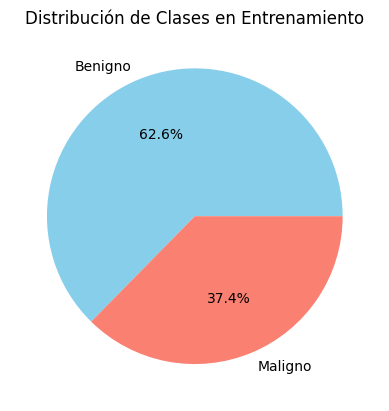

In [22]:
# Distribución en entrenamiento
y_train.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], labels=['Benigno', 'Maligno'])
plt.title('Distribución de Clases en Entrenamiento')
plt.ylabel('')
plt.show()

Se obsera que aproximadamente 2/3 del dataset son tumores benignos, esto puede causar cierto sesgo en el modelo. Estudiaremos en los proximos pasos si se presenta en este caso y el como manejarlo.

## Preprocesamiento y Exploración de datos

### División en Conjuntos de Entrenamiento y Prueba

Tomaremos el 20% de los datos como datos de prueba y el 80% restante para entrenamiento de nuestro modelo predictivo

In [23]:
# Dividir los datos
X = df.drop('target', axis=1)  # Características
y = df['target']  # Etiquetas

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Normalización de Datos

In [24]:
# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Verificación de distribucion de clases

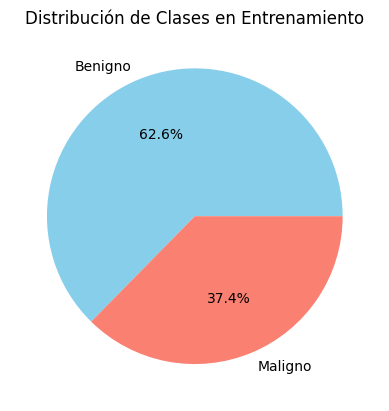

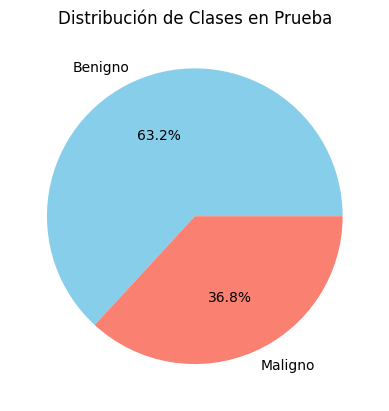

In [25]:
import matplotlib.pyplot as plt

# Distribución en entrenamiento
y_train.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], labels=['Benigno', 'Maligno'])
plt.title('Distribución de Clases en Entrenamiento')
plt.ylabel('')
plt.show()

# Distribución en prueba
y_test.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], labels=['Benigno', 'Maligno'])
plt.title('Distribución de Clases en Prueba')
plt.ylabel('')
plt.show()


Podemos observar que en general la distirbucien en ambos conjuntos es similar, por lo que deberiamos obtener buenos resultados de prediccion en base al entrenamiento.

## Modelado: Regresión Logística

### Búsqueda de hiperparámetros óptimos con validación cruzada utilizando GridSearchCV

Un hiperparámetro es un parámetro cuyo valor se establece antes de que comience el proceso de aprendizaje del modelo.

A diferencia de los parámetros internos del modelo que se ajustan durante el entrenamiento (como los coeficientes en una regresión logística), los hiperparámetros deben definirse antes de entrenar el modelo.

¿Para qué sirven los Hiperparámetros?. Los hiperparámetros controlan el comportamiento del algoritmo de aprendizaje y pueden influir en el rendimiento del modelo. Ayudan a definir la estructura del modelo y el proceso de entrenamiento, asegurando que el modelo sea capaz de generalizar bien a nuevos datos.

¿Por qué se configuran los Hiperparámetros? Configurar los hiperparámetros de manera adecuada es crucial para optimizar el rendimiento del modelo.

La búsqueda de hiperparámetros permite encontrar la combinación óptima de valores que maximiza la precisión y la capacidad del modelo para predecir correctamente.

Realizaremos la busqueda de los valores optimos de los mismos

In [26]:
# Definir el modelo y los hiperparámetros a ajustar
param_grid_LR = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],  
    'solver': ['lbfgs']
}

# Realizar la búsqueda de hiperparámetros con validación cruzada (con la cédula como semilla)
grid_search_LR = GridSearchCV(LogisticRegression(random_state=29501730, max_iter=1000), param_grid_LR, cv=3, scoring='accuracy')
grid_search_LR.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search_LR.best_params_
print("Mejores hiperparámetros:", best_params)


Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


Explicacion de los Hiperparámetros Obtenidos:

1. C (0.1):Controla la regularización del modelo.Un valor más pequeño (0.1) significa una regularización más fuerte para evitar el sobreajuste.

2. penalty ('l2'):Aplica regularización de Ridge, la cual ayuda a que el modelo no se vea tan afectado . Evita que los coeficientes del modelo sean demasiado grandes, haciéndolo más estable.La penalización L2 tiende a producir modelos más estables y menos sensibles a pequeñas variaciones en los datos de entrenamiento.

3. solver ('lbfgs'): Algoritmo utilizado para optimizar el modelo. Es rápido y eficiente para problemas de clasificación.

En general, la regularización (C y penalty): Evita el sobreajuste y mejora la generalización. La optimización (solver): Asegura un ajuste eficiente y preciso.


### Entrenamiento del Modelo

In [27]:
# Crear y entrenar el modelo con los mejores hiperparámetros
model = LogisticRegression(random_state=29501730, max_iter=1000, **best_params)
model.fit(X_train, y_train)


LogisticRegression(C=0.1, max_iter=1000, random_state=29501730)

### Predicciones

In [28]:
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

## Evaluación del Modelo

### Exactitud (Accuracy)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud: {accuracy:.2f}")

Exactitud: 0.97


### Matriz de Confusión

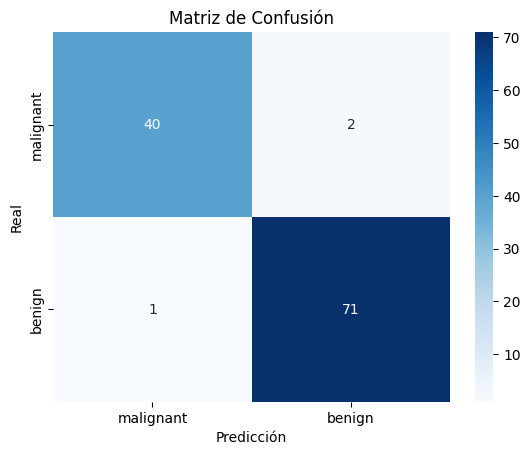

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

### F1-Score

In [31]:
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

F1-Score: 0.98


### Curva ROC y AUC

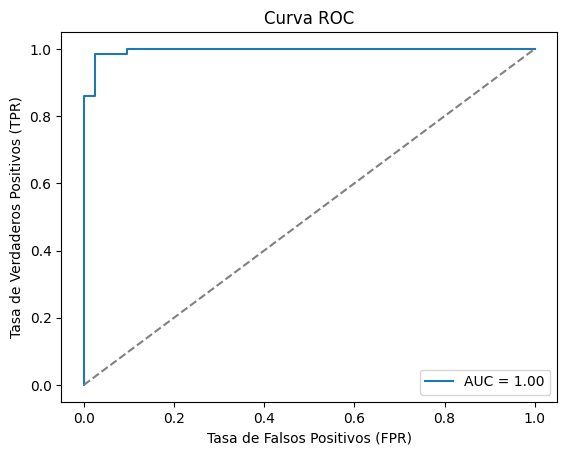

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Graficar la curva ROC
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

### Impacto del Balance de Clases en el Modelo

#### ¿Qué es el Balance de Clases?

El balance de clases se refiere a la distribución de las categorías (clases) en el conjunto de datos. En este caso, el dataset tiene dos clases:

Benigno (1): 357 muestras.

Maligno (0): 212 muestras.

Esto significa que hay más muestras de tumores benignos que malignos, lo que resulta en un desequilibrio de clases.

#### ¿Cómo Afecta el Desbalance de Clases al Modelo?

Cuando las clases están desbalanceadas, el modelo puede tener dificultades para aprender a predecir correctamente la clase minoritaria (en este caso, los tumores malignos). Esto ocurre porque:

Sesgo hacia la clase mayoritaria: El modelo puede volverse "perezoso" y simplemente predecir siempre la clase mayoritaria (benigno) para maximizar la exactitud (accuracy). Por ejemplo, si el 60% de los tumores son benignos, el modelo podría lograr un 60% de exactitud simplemente prediciendo siempre "benigno", lo cual no es útil.

Dificultad para aprender patrones de la clase minoritaria: Al haber menos muestras de tumores malignos, el modelo tiene menos oportunidades de aprender los patrones asociados a esta clase, lo que puede resultar en un menor recall (capacidad de detectar correctamente los tumores malignos).

### Explicación de Métricas

#### F1-Score: 

El F1-Score es una métrica que combina la precisión y el recall para proporcionar un único valor que refleja el equilibrio entre estos dos aspectos.

Precisión (Precision): Mide cuántos de los elementos predichos como positivos realmente lo son. Se calcula como la proporción de verdaderos positivos sobre la suma de verdaderos positivos y falsos positivos. En términos simples, responde a la pregunta: de todas las predicciones positivas, ¿cuántas eran correctas?

Recall (Sensibilidad o Recall): Mide cuántos de los elementos verdaderamente positivos fueron identificados correctamente por el modelo. Se calcula como la proporción de verdaderos positivos sobre la suma de verdaderos positivos y falsos negativos. En términos simples, responde a la pregunta: de todas las instancias verdaderamente positivas, ¿cuántas fueron detectadas?

El F1-Score se define como la media armónica de la precisión y el recall, proporcionando un único valor que equilibra ambos aspectos. Esta métrica es especialmente útil en contextos donde el costo de los falsos negativos es alto, como en la detección de enfermedades (por ejemplo, cáncer de mama) donde es crucial identificar todos los casos positivos.

#### AUC (Área bajo la curva ROC):

El AUC, o área bajo la curva ROC, es una métrica que evalúa la capacidad del modelo para distinguir entre las dos clases, independientemente del umbral de clasificación.

Curva ROC (Receiver Operating Characteristic): Es una gráfica que muestra la relación entre el verdadero positivo (sensitivity o recall) y el falso positivo rate (proporción de falsos positivos) para diferentes umbrales de clasificación.

Un AUC cercano a 1 indica que el modelo tiene una excelente capacidad para separar las clases, incluso si están desbalanceadas. Esto significa que el modelo es bueno para clasificar correctamente las instancias positivas y negativas, incluso si el umbral de decisión varía.

#### ¿Por qué el F1-Score y el AUC son Importantes?

En muchos casos, la métrica de exactitud puede ser engañosa, especialmente cuando las clases están desbalanceadas como en este caso.

Exactitud (Accuracy): Mide la proporción de predicciones correctas sobre el total de predicciones. Aunque una alta exactitud es deseable, no siempre refleja la verdadera capacidad del modelo para identificar ambas clases de manera equilibrada.

Por ejemplo, si se tiene un conjunto de datos donde el 98% de las instancias son negativas y solo el 2% son positivas, un modelo que siempre predice la clase negativa tendrá una alta exactitud (98%), pero fallará completamente en identificar las instancias positivas. En nuestro caso el desbalance es mucho menor.

En estos casos es donde el F1-score y el AUC se vuelven cruciales:

F1-Score: Proporciona una visión más equilibrada de la capacidad del modelo para identificar correctamente tanto las instancias positivas como negativas, considerando el desbalance de clases.

AUC: Evalúa la capacidad del modelo para separar las clases independientemente del umbral, ofreciendo una medida más robusta de la calidad del modelo en contextos con clases desbalanceadas.

Aunque la exactitud de nuestro modelo es alta (0.97), esto no nos dice mucho sobre la capacidad del modelo para predecir correctamente ambas clases. El F1-score, que combina precisión y recall, es una métrica más adecuada en este caso, ya que tiene en cuenta el desbalance de clases. En esta metrica obtuvimos un resultado del 0.98. Adicionalmente se obtuvo una muy buena gráfica AUC, igual a 1 en practicamente toda su extension. En general las métricas son consistentes en los resultados y representan a un modelo que tiene un alto grado de eficiciente realziando predicciones.